In [1]:
from pathlib import Path
from ludwig import repo_root
from collections import Counter
from tabulate import tabulate
import json

In [2]:
path = repo_root().joinpath('assets/plugh/plugh.json')
assert path.exists()

full = json.load(path.open('r'))
len(full)

125

In [3]:
full[0]

{'id': 0,
 'source_zfile': 'advent.z5.script.json',
 'isomorphic_id': 0,
 'split': 'train',
 'text': 'At the crest of a stone descent known as the Top of Small Pit, the explorer stood, gazing into the depths where white mist whispered secrets from below. A pathway to the west was blocked save for a narrow crack that beckoned the daring. Rough steps carved from the ancient rock led downward, inviting further exploration.\n\nWith a steadying breath, the explorer descended the steps into the expansive Hall of Mists. The hall stretched endlessly to the west, its boundaries obscured by swirling, ghost-like mists. Openings flanked either side of the hall, while a wide stone staircase spiraled downward, the source of a chilling wind that stirred the mist into eerie dances. Behind, a passage climbed into the darkness of a domed chamber.\n\nIn the midst of exploration, the explorer noticed their score had increased by twenty-five points, a silent acknowledgment of their progress.\n\nMoving forw

In [4]:
print(tabulate(Counter(item['isomorphic_id'] for item in full).most_common(),))

--  --
 8  24
10  13
 6   5
 4   4
 7   4
 9   4
 0   3
13   3
33   3
 3   2
 5   2
14   2
15   2
16   2
30   2
40   2
43   2
48   2
53   2
 1   1
 2   1
11   1
12   1
17   1
18   1
19   1
20   1
21   1
22   1
23   1
24   1
25   1
26   1
27   1
28   1
29   1
31   1
32   1
34   1
35   1
36   1
37   1
38   1
39   1
41   1
42   1
44   1
45   1
46   1
47   1
49   1
50   1
51   1
52   1
54   1
55   1
56   1
57   1
58   1
59   1
60   1
--  --


In [10]:
text, dot_G = full[0]['task1']['few_shots'][1]
print(text)

In the heart of the Dwarven City of Deephome, nestled at the Eastern Guard Post, the air was heavy with the scent of polished iron and wood. This fortified sanctuary was designed like an hourglass, walls tapering in the center where two heavy iron-banded doors stood vigilant. Weapons racks adorned the room, crossbows hanging prominently among the assortment. Beyond, defensive low walls skirted the perimeter, poised for any threat that might venture through the city gates to the southeast.

Moving westward, the roads diverged at the Intersection. Main Street stretched north and south, while the Royal Road beckoned westward. Signs and symbols marked the significance of each path, the eastern guard post standing sentinel with its own placard.

Along the East Royal Road, high walls lined the path, interrupted by gates leading to the estates of lesser nobles. The way was clear, the road extending from the bustling intersection toward the grandeur of the castle to the west.

Transitioning on

In [5]:
dot_G = full[0]['task1']['few_shots'][1][1]
print(dot_G)

graph {
	"outer court" -- "throne room"
	"n. main street" -- "bakery"
	"east royal road" -- "intersection"
	"east royal road" -- "west royal road"
	"n. main street" -- "s. main street"
	"eastern guard post" -- "intersection"
	"n. main street" -- "scrivener's"
	"s. main street" -- "intersection"
	"outer court" -- "west royal road"
}


In [6]:
import networkx as nx
import io
import matplotlib.pyplot as plt

In [7]:
s = io.StringIO(dot_G)
G = nx.drawing.nx_pydot.read_dot(s)

In [ ]:
edges = full[0]['task1']['target']

G = nx.Graph()
for s, e in edges:
	G.add_edge(s, e)

G

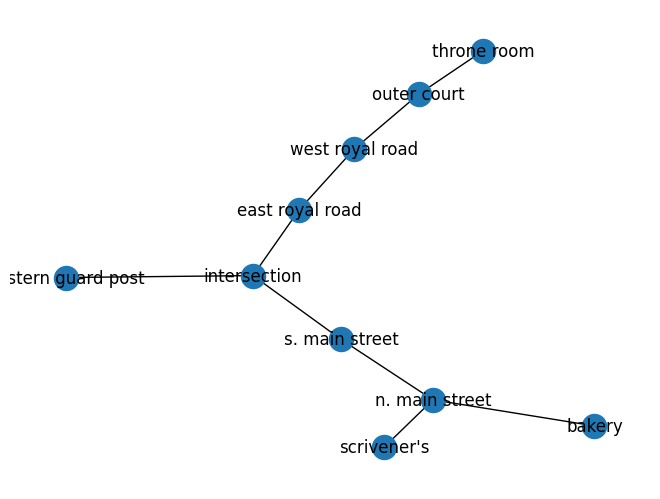

In [8]:

nx.draw(G, with_labels=True)

# 3. Display the graph
plt.show()

In [ ]:
from mpmath.matrices.matrices import rowsep

len(range(10,100))

In [ ]:
from pathlib import Path

In [ ]:
Path('foo/bar').relative_to('foo')

In [ ]:
# find what model is running on a vllm server
import requests
import json
import os
from typing import Dict, Any

def get_vllm_model_info(server_url: str) -> Dict[str, Any]:
	"""
	Get the model information from a VLLM server.

	Args:
		server_url (str): The URL of the VLLM server.

	Returns:
		Dict[str, Any]: A dictionary containing the model information.
	"""
	try:
		response = requests.get(f"{server_url}/v1/models")
		response.raise_for_status()  # Raise an error for bad responses
		model_info = response.json()
		return model_info
	except requests.RequestException as e:
		print(f"Error fetching model info: {e}")
		return {}

info = get_vllm_model_info("http://localhost:8000")
info

In [ ]:
info['data'][0]['id']

In [ ]:
import openai

In [ ]:
openai.ChatCompletion.create(
	  model="microsoft/Phi-4-multimodal-instruct",

  messages=[
		{"role": "user", "content": "Hello!"},
	]
	# temperature=0,
)

In [ ]:
from openai import OpenAI

# Modify OpenAI's API key and API base to use vLLM's API server.
openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"
client = OpenAI(
	api_key=openai_api_key,
	base_url=openai_api_base,
)
completion = client.completions.create(model="microsoft/Phi-4-multimodal-instruct",
									  prompt="Complete the sentence: San Francisco is a")
print("Completion result:", completion)

In [ ]:
resp = client.chat.completions.create(model="microsoft/Phi-4-multimodal-instruct",
									  messages=[{'role':'user', 'content': 'Tell me a short joke.'}])
resp

In [ ]:
resp.choices[0].completion_tokens

In [ ]:
resp.usage

In [ ]:
stream = client.chat.completions.create(model="microsoft/Phi-4-multimodal-instruct", stream=True,
										stream_options={"include_usage": True},
									  messages=[{'role':'user', 'content': 'Tell me a short joke.'}])


In [ ]:
stream

In [ ]:
chunk = next(stream)

In [ ]:
chunk.choices[0].delta

In [ ]:
type(stream)

In [ ]:
chunk

In [ ]:
type(chunk)

In [ ]:
client = openai.OpenAI(api_key='EMPTY', base_url='http://localhost:8000/v1')


In [ ]:
str(client.base_url)

In [ ]:
client.base_url.host

In [ ]:
str(client.base_url)[:-3]

In [ ]:
openai.types.chat.chatcompletion.ChatCompletionChunk

In [ ]:
openai.ChatCompletion.chatcompletion.ChatCompletionChunk

In [ ]:
openai.ChatCompletion

In [ ]:
from pathlib import Path
from ludwig.direct_prompt_and_parse.dpp_ttt import DPPforTicTacToe
from ludwig.util.clients import MockEndpoint

In [ ]:
dpp = DPPforTicTacToe('bfs', client=MockEndpoint())

In [ ]:
dpp.state_desc_template

In [ ]:
root = Path().absolute().parent.joinpath('assets/prompts') / 'dpp'
root.mkdir(parents=True, exist_ok=True)

In [ ]:
# root.joinpath('respones.txt').write_text(dpp.response_template, encoding='utf-8')

In [ ]:
class TestContextManager:
	def __enter__(self):
		print("Entering context")
		self.data = {}
		return self.data

	def __exit__(self, exc_type, exc_value, traceback):
		print("Exiting context")
		if exc_type:
			print(f"An exception occurred: {exc_value}")
		self.data['something']= 'foo'

class Top:
	def collect(self):
		return TestContextManager()

cm  = Top()

with cm.collect() as x:
	print(x)
	pass
print(x)

In [ ]:
with strat.collect_stats() as stats:
	strat.work(something)
print(stats)

In [ ]:
# def is_valid_tic_tac_toe(board):
# 	def count(board):
# 		x_count = sum(row.count('X') for row in board)
# 		o_count = sum(row.count('O') for row in board)
# 		return x_count, o_count
#
# 	def win(player):
# 		# Check rows, columns, and diagonals
# 		for i in range(3):
# 			if all(board[i][j] == player for j in range(3)):  # row
# 				return True
# 			if all(board[j][i] == player for j in range(3)):  # column
# 				return True
# 		if all(board[i][i] == player for i in range(3)):      # main diagonal
# 			return True
# 		if all(board[i][2 - i] == player for i in range(3)):  # anti-diagonal
# 			return True
# 		return False
#
# 	x_count, o_count = count(board)
#
# 	# Rule: X always goes first
# 	if o_count > x_count or x_count > o_count + 1:
# 		return False
#
# 	x_win = win('X')
# 	o_win = win('O')
#
# 	# Rule: Both players cannot win simultaneously
# 	if x_win and o_win:
# 		return False
#
# 	# Rule: If X wins, X must have one more move
# 	if x_win and x_count != o_count + 1:
# 		return False
#
# 	# Rule: If O wins, X and O must have the same number of moves
# 	if o_win and x_count != o_count:
# 		return False
#
# 	return True
#
# def check_winner(board):
# 	def win(player):
# 		# Check rows, columns, and diagonals
# 		for i in range(3):
# 			if all(board[i][j] == player for j in range(3)):  # row
# 				return True
# 			if all(board[j][i] == player for j in range(3)):  # column
# 				return True
# 		if all(board[i][i] == player for i in range(3)):      # main diagonal
# 			return True
# 		if all(board[i][2 - i] == player for i in range(3)):  # anti-diagonal
# 			return True
# 		return False
#
# 	if win('X'):
# 		return 'X'
# 	elif win('O'):
# 		return 'O'
# 	else:
# 		return None
#
# from itertools import product
# def generate_ttt_states():
# 	for raw in product(*[['X', 'O', ' '] for _ in range(9)]):
# 		board = [list(raw[i:i+3]) for i in range(0, 9, 3)]
# 		if is_valid_tic_tac_toe(board):
# 			yield board
#
# def generate_next_states(state):
# 	# Count pieces
# 	x_count = sum(row.count('X') for row in state)
# 	o_count = sum(row.count('O') for row in state)
#
# 	# Infer next player
# 	if x_count == o_count:
# 		player = 'X'
# 	elif x_count == o_count + 1:
# 		player = 'O'
# 	else:
# 		raise ValueError("Invalid board state: too many Xs or Os")
#
# 	# Generate next states
# 	next_states = []
# 	for i in range(3):
# 		for j in range(3):
# 			if state[i][j] == ' ':
# 				new_state = [row[:] for row in state]
# 				new_state[i][j] = player
# 				next_states.append(new_state)
# 	return next_states
#
# def state_value(state):
# 	winner = check_winner(state)
# 	if winner == 'X':
# 		return 1
# 	elif winner == 'O':
# 		return -1
#
# 	options = [state_value(state) for state in generate_next_states(state)]
# 	return sum(options) / len(options) if options else 0


In [ ]:
states = list(generate_ttt_states())
len(states)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
to_code = lambda state: ''.join(''.join(row) for row in state)
exp_values = {to_code(state): state_value(state) for state in tqdm(states)}


In [ ]:
# import json
# json.dump(exp_values, open('expectimax.json', 'w'), indent=2)

In [ ]:
exp_values[' '*9]

In [ ]:
exp_values['XXO O    ']

In [ ]:
from collections import Counter

In [ ]:
Counter(check_winner(tuple(state)) for state in states)

In [ ]:
sel = [state for state in states if check_winner(tuple(state)) == 'X']
len(sel)

In [ ]:
def check_winner(state):
	lines = [
		state[0:3], state[3:6], state[6:9],  # rows
		state[0::3], state[1::3], state[2::3],  # columns
		state[0::4], state[2:7:2]  # diagonals
	]
	for line in lines:
		if line == 'XXX':
			return 'X'
		if line == 'OOO':
			return 'O'
	return None

def is_full(state):
	return ' ' not in state

from functools import lru_cache

def generate_next_states(state):
	if check_winner(state) is not None:
		return []
	is_x_turn = state.count('X') == state.count('O')
	next_states = []
	for i in range(9):
		if state[i] == ' ':
			new_state = state[:i] + ('X' if is_x_turn else 'O') + state[i+1:]
			next_states.append(new_state)
	return next_states


@lru_cache(maxsize=None)
def minimax(state):
	winner = check_winner(state)
	if winner == 'X':
		return 1
	if winner == 'O':
		return -1
	if is_full(state):
		return 0
	is_x_turn = state.count('X') == state.count('O')
	return (max if is_x_turn else min)(minimax(option) for option in generate_next_states(state))

@lru_cache(maxsize=None)
def expectimax(state):
	winner = check_winner(state)
	if winner == 'X':
		return 1
	if winner == 'O':
		return -1
	if is_full(state):
		return 0
	is_x_turn = state.count('X') == state.count('O')
	values = [expectimax(option) for option in generate_next_states(state)]
	return sum(values) / len(values) if values else 0


In [ ]:
all_states = []
past_states = set()
origin_state = ' ' * 9
todo = [origin_state]
while todo:
	state = todo.pop()
	all_states.append(state)
	past_states.add(state)
	for next_state in generate_next_states(state):
		if next_state not in past_states:
			todo.append(next_state)
len(all_states)

In [ ]:
all_states

In [ ]:
mm_values = {state: minimax(state) for state in tqdm(all_states)}
Counter(mm_values.values()), mm_values[origin_state]

In [ ]:
ex_values = {state: expectimax(state) for state in tqdm(all_states)}
ex_values[origin_state]

In [ ]:
mm_values['XXOOXOX  ']

In [ ]:
import json
json.dump(mm_values, open('minimax.json', 'w'), indent=2)
json.dump(ex_values, open('expectimax.json', 'w'), indent=2)

In [ ]:
mm_values = {state: minimax_str(state, True) for state in tqdm(exp_values)}

In [ ]:
Counter(mm_values.values())

In [ ]:
mm_values[' '*9]

In [ ]:
from tabulate import tabulate

In [ ]:
inits = ["OO X  X X", "OX X XO  ", "OXX   O X", "O XX  X O"]
for init in inits:
	print(f'{init!r} - {mm_values[init]:.1f} - {exp_values[init]:.1f}')
	tbl = []
	for state in generate_next_states(init):
		tbl.append((state, state[4] == 'O', mm_values[state], exp_values[state]))
	print(tabulate(tbl, headers=['State', 'Minimax', 'Expectimax'], tablefmt='grid'))
	print()

In [ ]:
all_states = list(mm_values)

In [ ]:
candidates = [state for state in all_states if state.count(' ') == 4 and state[4] == ' ' and check_winner_str(state) is None]
len(candidates)

In [ ]:
candidates[0]

In [ ]:
cand_vals = [{n: mm_values[n] for n in generate_next_states(state)} for state in candidates]
gold = []
for state, vals in zip(candidates, cand_vals):
	m = list(state)
	m[4] = 'O'
	m = ''.join(m)
	if vals[m] < min(v for s, v in vals.items() if s != m):
		gold.append(state)
len(gold)

In [ ]:
gold # where taking the middle is actually the best

In [ ]:
# print(gold) # ['XXOO   X ', 'XXOO    X', 'XXO  O  X', 'XXO   OX ', 'XXO   O X', 'XXO    OX', 'XX O O X ', 'XX O O  X', 'XOXO  X  ', 'XOX  O  X', 'XOX   XO ', 'XOX    OX', 'XOO  X  X', 'XO X XO  ', 'XO X X O ', 'XO X  O X', 'XO X   OX', 'XO   XXO ', 'XO   X OX', 'XO    XOX', 'XO    OXX', 'X XO OX  ', 'X XO O X ', 'X XO O  X', 'X OX XO  ', 'X OX  O X', 'X OO X  X', 'X O  XOX ', 'X O  XO X', 'X O  X OX', 'X O   OXX', 'X  X OO X', 'X  X  OOX', 'X  O OX X', 'X  O O XX', 'X  O  XOX', 'X  O  OXX', 'X    OOXX', 'OXXO  X  ', 'OXX  OX  ', 'OXX  O X ', 'OXX   XO ', 'OXX   X O', 'OXX    XO', 'OXOX X   ', 'OXOX   X ', 'OXO  X X ', 'OX X XO  ', 'OX X X O ', 'OX X X  O', 'OX X O X ', 'OX X  OX ', 'OX X   XO', 'OX   XX O', 'OX   X XO', 'OX    XXO', 'OOXX  X  ', 'O XX X  O', 'O XX OX  ', 'O XX  XO ', 'O XX  X O', 'O XX   XO', 'O X  XX O', 'O X   XXO', 'O  X XXO ', 'O  X XX O', 'O  X XOX ', 'O  X X XO', ' XXO OX  ', ' XXO O X ', ' XOX XO  ', ' XOX X O ', ' XOX X  O', ' XOX  OX ', ' XOX  O X', ' XOO X X ', ' XO  XOX ', ' XO  X XO', ' XO   OXX', ' X X OOX ', ' X X  OXO', ' X O X XO', ' X O OXX ', ' X O OX X', ' X O O XX', ' X O  XXO', ' X   XOXO', ' X   OOXX', ' OXX X O ', ' OXX X  O', ' OXX  XO ', ' OXX   OX', ' OX  XXO ', ' OX  XX O', ' OX   XXO', ' OX   XOX', ' O X XXO ', ' O X XOX ', ' O X X XO', ' O X X OX', '  XO XX O', '  XO OXX ', '  XO OX X', '  XO  XXO', '  X  XXOO', '  X  OXXO', '  X  OXOX', '  OX XOX ', '  OX XO X', '  OX X XO', '  OX X OX', '   X XOXO']

# print(candidates) # ['XXOX O   ', 'XXOX  O  ', 'XXOX   O ', 'XXOX    O', 'XXOO X   ', 'XXOO  X  ', 'XXOO   X ', 'XXOO    X', 'XXO  XO  ', 'XXO  X O ', 'XXO  X  O', 'XXO  OX  ', 'XXO  O X ', 'XXO  O  X', 'XXO   XO ', 'XXO   X O', 'XXO   OX ', 'XXO   O X', 'XXO    XO', 'XXO    OX', 'XX X OO  ', 'XX X O O ', 'XX X O  O', 'XX X  OO ', 'XX X  O O', 'XX X   OO', 'XX O XO  ', 'XX O X O ', 'XX O X  O', 'XX O OX  ', 'XX O O X ', 'XX O O  X', 'XX O  XO ', 'XX O  X O', 'XX O  OX ', 'XX O  O X', 'XX O   XO', 'XX O   OX', 'XX   XOO ', 'XX   XO O', 'XX   X OO', 'XX   OXO ', 'XX   OX O', 'XX   OOX ', 'XX   OO X', 'XX   O XO', 'XX   O OX', 'XX    XOO', 'XX    OXO', 'XX    OOX', 'XOXX O   ', 'XOXX  O  ', 'XOXX   O ', 'XOXX    O', 'XOXO X   ', 'XOXO  X  ', 'XOXO   X ', 'XOXO    X', 'XOX  XO  ', 'XOX  X O ', 'XOX  X  O', 'XOX  OX  ', 'XOX  O X ', 'XOX  O  X', 'XOX   XO ', 'XOX   X O', 'XOX   OX ', 'XOX   O X', 'XOX    XO', 'XOX    OX', 'XOOX X   ', 'XOOX   X ', 'XOOX    X', 'XOO  XX  ', 'XOO  X X ', 'XOO  X  X', 'XOO   XX ', 'XOO   X X', 'XOO    XX', 'XO X XO  ', 'XO X X O ', 'XO X X  O', 'XO X O X ', 'XO X O  X', 'XO X  OX ', 'XO X  O X', 'XO X   XO', 'XO X   OX', 'XO O XX  ', 'XO O X X ', 'XO O X  X', 'XO O  XX ', 'XO O  X X', 'XO O   XX', 'XO   XXO ', 'XO   XX O', 'XO   XOX ', 'XO   XO X', 'XO   X XO', 'XO   X OX', 'XO   OXX ', 'XO   OX X', 'XO   O XX', 'XO    XXO', 'XO    XOX', 'XO    OXX', 'X XX OO  ', 'X XX O O ', 'X XX O  O', 'X XX  OO ', 'X XX  O O', 'X XX   OO', 'X XO XO  ', 'X XO X O ', 'X XO X  O', 'X XO OX  ', 'X XO O X ', 'X XO O  X', 'X XO  XO ', 'X XO  X O', 'X XO  OX ', 'X XO  O X', 'X XO   XO', 'X XO   OX', 'X X  XOO ', 'X X  XO O', 'X X  X OO', 'X X  OXO ', 'X X  OX O', 'X X  OOX ', 'X X  OO X', 'X X  O XO', 'X X  O OX', 'X X   XOO', 'X X   OXO', 'X X   OOX', 'X OX XO  ', 'X OX X O ', 'X OX X  O', 'X OX O X ', 'X OX O  X', 'X OX  OX ', 'X OX  O X', 'X OX   XO', 'X OX   OX', 'X OO XX  ', 'X OO X X ', 'X OO X  X', 'X OO  XX ', 'X OO  X X', 'X OO   XX', 'X O  XXO ', 'X O  XX O', 'X O  XOX ', 'X O  XO X', 'X O  X XO', 'X O  X OX', 'X O  OXX ', 'X O  OX X', 'X O  O XX', 'X O   XXO', 'X O   XOX', 'X O   OXX', 'X  X XOO ', 'X  X XO O', 'X  X X OO', 'X  X OOX ', 'X  X OO X', 'X  X O XO', 'X  X O OX', 'X  X  OXO', 'X  X  OOX', 'X  O XXO ', 'X  O XX O', 'X  O XOX ', 'X  O XO X', 'X  O X XO', 'X  O X OX', 'X  O OXX ', 'X  O OX X', 'X  O O XX', 'X  O  XXO', 'X  O  XOX', 'X  O  OXX', 'X    XXOO', 'X    XOXO', 'X    XOOX', 'X    OXXO', 'X    OXOX', 'X    OOXX', 'OXXX O   ', 'OXXX  O  ', 'OXXX   O ', 'OXXX    O', 'OXXO X   ', 'OXXO  X  ', 'OXXO   X ', 'OXXO    X', 'OXX  XO  ', 'OXX  X O ', 'OXX  X  O', 'OXX  OX  ', 'OXX  O X ', 'OXX  O  X', 'OXX   XO ', 'OXX   X O', 'OXX   OX ', 'OXX   O X', 'OXX    XO', 'OXX    OX', 'OXOX X   ', 'OXOX  X  ', 'OXOX   X ', 'OXOX    X', 'OXO  XX  ', 'OXO  X X ', 'OXO  X  X', 'OXO   XX ', 'OXO   X X', 'OXO    XX', 'OX X XO  ', 'OX X X O ', 'OX X X  O', 'OX X OX  ', 'OX X O X ', 'OX X O  X', 'OX X  XO ', 'OX X  X O', 'OX X  OX ', 'OX X  O X', 'OX X   XO', 'OX X   OX', 'OX O XX  ', 'OX O X X ', 'OX O X  X', 'OX O  XX ', 'OX O  X X', 'OX O   XX', 'OX   XXO ', 'OX   XX O', 'OX   XOX ', 'OX   XO X', 'OX   X XO', 'OX   X OX', 'OX   OXX ', 'OX   OX X', 'OX   O XX', 'OX    XXO', 'OX    XOX', 'OX    OXX', 'OOXX X   ', 'OOXX  X  ', 'OOXX   X ', 'OOXX    X', 'OOX  XX  ', 'OOX  X X ', 'OOX   XX ', 'OOX   X X', 'OOX    XX', 'OO X XX  ', 'OO X X X ', 'OO X X  X', 'OO X  XX ', 'OO X  X X', 'OO X   XX', 'OO   XXX ', 'OO   XX X', 'OO   X XX', 'O XX XO  ', 'O XX X O ', 'O XX X  O', 'O XX OX  ', 'O XX O X ', 'O XX O  X', 'O XX  XO ', 'O XX  X O', 'O XX  OX ', 'O XX  O X', 'O XX   XO', 'O XX   OX', 'O XO XX  ', 'O XO X X ', 'O XO  XX ', 'O XO  X X', 'O XO   XX', 'O X  XXO ', 'O X  XX O', 'O X  XOX ', 'O X  X XO', 'O X  OXX ', 'O X  OX X', 'O X  O XX', 'O X   XXO', 'O X   XOX', 'O X   OXX', 'O OX XX  ', 'O OX X X ', 'O OX X  X', 'O OX  XX ', 'O OX  X X', 'O OX   XX', 'O O  XXX ', 'O O  XX X', 'O O  X XX', 'O  X XXO ', 'O  X XX O', 'O  X XOX ', 'O  X XO X', 'O  X X XO', 'O  X X OX', 'O  X OXX ', 'O  X OX X', 'O  X O XX', 'O  X  XXO', 'O  X  XOX', 'O  X  OXX', 'O  O XXX ', 'O  O XX X', 'O  O X XX', 'O    XXXO', 'O    XXOX', 'O    XOXX', ' XXX OO  ', ' XXX O O ', ' XXX O  O', ' XXX  OO ', ' XXX  O O', ' XXX   OO', ' XXO XO  ', ' XXO X O ', ' XXO X  O', ' XXO OX  ', ' XXO O X ', ' XXO O  X', ' XXO  XO ', ' XXO  X O', ' XXO  OX ', ' XXO  O X', ' XXO   XO', ' XXO   OX', ' XX  XOO ', ' XX  XO O', ' XX  X OO', ' XX  OXO ', ' XX  OX O', ' XX  OOX ', ' XX  OO X', ' XX  O XO', ' XX  O OX', ' XX   XOO', ' XX   OXO', ' XX   OOX', ' XOX XO  ', ' XOX X O ', ' XOX X  O', ' XOX OX  ', ' XOX O X ', ' XOX O  X', ' XOX  XO ', ' XOX  X O', ' XOX  OX ', ' XOX  O X', ' XOX   XO', ' XOX   OX', ' XOO XX  ', ' XOO X X ', ' XOO X  X', ' XOO  XX ', ' XOO  X X', ' XOO   XX', ' XO  XXO ', ' XO  XX O', ' XO  XOX ', ' XO  XO X', ' XO  X XO', ' XO  X OX', ' XO  OXX ', ' XO  OX X', ' XO  O XX', ' XO   XXO', ' XO   XOX', ' XO   OXX', ' X X XOO ', ' X X XO O', ' X X X OO', ' X X OXO ', ' X X OX O', ' X X OOX ', ' X X OO X', ' X X O XO', ' X X O OX', ' X X  XOO', ' X X  OXO', ' X X  OOX', ' X O XXO ', ' X O XX O', ' X O XOX ', ' X O XO X', ' X O X XO', ' X O X OX', ' X O OXX ', ' X O OX X', ' X O O XX', ' X O  XXO', ' X O  XOX', ' X O  OXX', ' X   XXOO', ' X   XOXO', ' X   XOOX', ' X   OXXO', ' X   OXOX', ' X   OOXX', ' OXX XO  ', ' OXX X O ', ' OXX X  O', ' OXX OX  ', ' OXX O X ', ' OXX O  X', ' OXX  XO ', ' OXX  X O', ' OXX  OX ', ' OXX  O X', ' OXX   XO', ' OXX   OX', ' OXO XX  ', ' OXO X X ', ' OXO  XX ', ' OXO  X X', ' OXO   XX', ' OX  XXO ', ' OX  XX O', ' OX  XOX ', ' OX  X XO', ' OX  OXX ', ' OX  OX X', ' OX  O XX', ' OX   XXO', ' OX   XOX', ' OX   OXX', ' OOX XX  ', ' OOX X X ', ' OOX X  X', ' OOX  XX ', ' OOX  X X', ' OOX   XX', ' OO  XXX ', ' OO  XX X', ' OO  X XX', ' O X XXO ', ' O X XX O', ' O X XOX ', ' O X XO X', ' O X X XO', ' O X X OX', ' O X OXX ', ' O X OX X', ' O X O XX', ' O X  XXO', ' O X  XOX', ' O X  OXX', ' O O XXX ', ' O O XX X', ' O O X XX', ' O   XXXO', ' O   XXOX', ' O   XOXX', '  XX XOO ', '  XX XO O', '  XX X OO', '  XX OXO ', '  XX OX O', '  XX OOX ', '  XX OO X', '  XX O XO', '  XX O OX', '  XX  XOO', '  XX  OXO', '  XX  OOX', '  XO XXO ', '  XO XX O', '  XO XOX ', '  XO X XO', '  XO OXX ', '  XO OX X', '  XO O XX', '  XO  XXO', '  XO  XOX', '  XO  OXX', '  X  XXOO', '  X  XOXO', '  X  OXXO', '  X  OXOX', '  X  OOXX', '  OX XXO ', '  OX XX O', '  OX XOX ', '  OX XO X', '  OX X XO', '  OX X OX', '  OX OXX ', '  OX OX X', '  OX O XX', '  OX  XXO', '  OX  XOX', '  OX  OXX', '  OO XXX ', '  OO XX X', '  OO X XX', '  O  XXXO', '  O  XXOX', '  O  XOXX', '   X XXOO', '   X XOXO', '   X XOOX', '   X OXXO', '   X OXOX', '   X OOXX', '   O XXXO', '   O XXOX', '   O XOXX']

In [ ]:
import json
from omnibelt import pformat

In [ ]:
products = {'p1': {'title': 'Product 1', 'description': 'Description of product 1'},
			'p2': {'title': 'Product 2', 'description': 'Description of product 2'},
			'p3': {'title': 'Product 3', 'description': 'Description of product 3'}}
selected1 = '["p1", "p2"]'

In [ ]:
pformat('{[x for x in range(3)]}')

In [ ]:


# tmpl = "The user selected the following recommendation:\n{'- '+'\n- '.join([f'**{products[pid]['title']}**: {products[pid]['description']}' for pid in json.loads(selected1)])}"
#
# print(pformat(tmpl, products=products, json=json, selected1=selected1))


In [ ]:
# eval('''[f'**{products[pid]["title"]}**: {products[pid]["description"]}' for pid in json.loads(selected1)]''')

In [ ]:
import ast

raw = "[state_value(state=[['X', 'O', ' '], [' ', 'X', ' '], ['O', ' ', 'O']], current_player='X')]"

exp = ast.parse(raw, mode='eval')

exp.body

In [ ]:
import ast
import json

parsed_json

In [ ]:
import openai

In [ ]:
Function = openai.types.chat.chat_completion_message_tool_call.Function
ToolCall = openai.types.chat.chat_completion_message_tool_call.ChatCompletionMessageToolCall

In [ ]:

function_name = parsed_json[0]['name']
arguments_dict = parsed_json[0]['']
function_obj = Function(
            name=function_name,
            arguments=json.dumps(arguments_dict)
        )

In [ ]:
import ast
import json
import uuid
from typing import List

from openai.types.chat.chat_completion_message_tool_call import ChatCompletionMessageToolCall as ToolCall
from openai.types.chat.chat_completion_message_tool_call import Function
# except ImportError:
#     print("openai library not found. Using mock objects for demonstration.")
#     from pydantic import BaseModel, Field
#
#     class Function(BaseModel):
#         name: str
#         arguments: str
#
#     class ToolCall(BaseModel):
#         id: str = Field(default_factory=lambda: f"call_{uuid.uuid4().hex}")
#         function: Function
#         type: str = "function"


def parse_to_openai_tool_calls(raw_string: str) -> List[ToolCall]:
    """
    Parses a stringified list of tool calls into a list of OpenAI-compatible
    ChatCompletionMessageToolCall Pydantic objects.

    Args:
        raw_string: A string representing a Python list of function calls,
                    e.g., "[my_func(arg1='val1'), another_func(arg2=123)]"

    Returns:
        A list of ToolCall Pydantic objects.
    """
    try:
        parsed_ast = ast.parse(raw_string, mode='eval')
        if not isinstance(parsed_ast.body, ast.List):
            raise ValueError("Input string must be a list of function calls.")
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing the raw string: {e}")
        return []

    tool_calls = []
    for call_node in parsed_ast.body.elts:
        if not isinstance(call_node, ast.Call):
            continue

        # 1. Extract function name and arguments
        function_name = call_node.func.id
        arguments_dict = {
            keyword.arg: ast.literal_eval(keyword.value)
            for keyword in call_node.keywords
        }

        # 2. Create the Pydantic `Function` object
        # The arguments must be a JSON string.
        function_obj = Function(
            name=function_name,
            arguments=json.dumps(arguments_dict)
        )

        # 3. Create the `ToolCall` Pydantic object
        tool_call_obj = ToolCall(
            id=f"call_{uuid.uuid4().hex}",
            function=function_obj,
			type='function',
        )
        tool_calls.append(tool_call_obj)

    return tool_calls

# --- Example Usage ---
raw = "[state_value(state=[['X', 'O', ' '], [' ', 'X', ' '], ['O', ' ', 'O']], current_player='X'), next_state(state=[['X', 'O', ' '], [' ', 'X', ' '], ['O', ' ', 'O']], current_player='X')]"

# Get the list of formatted Pydantic tool call objects
parsed_tool_calls = parse_to_openai_tool_calls(raw)

# # To print the result, we convert the Pydantic objects to dictionaries
# # using model_dump() and then serialize to a JSON string for readability.
# if parsed_tool_calls:
#     # `model_dump()` is the Pydantic v2 method to convert model to dict
#     list_of_dicts = [call.model_dump() for call in parsed_tool_calls]
#     print(json.dumps(list_of_dicts, indent=2))
parsed_tool_calls


In [ ]:
import ast
import json
import uuid
import re
from typing import List, Optional, Dict

# In your actual application, you would import the real Pydantic models
# from openai.types.chat.chat_completion_message_tool_call import ChatCompletionMessageToolCall, Function
# For this example to be self-contained and runnable, we'll mock them.
try:
    from openai.types.chat.chat_completion_message_tool_call import ChatCompletionMessageToolCall as ToolCall
    from openai.types.chat.chat_completion_message_tool_call import Function
except ImportError:
    print("openai library not found. Using mock objects for demonstration.")
    from pydantic import BaseModel, Field

    class Function(BaseModel):
        name: str
        arguments: str

    class ToolCall(BaseModel):
        id: str = Field(default_factory=lambda: f"call_{uuid.uuid4().hex}")
        function: Function
        type: str = "function"

def _build_tool_call(name: str, args: dict) -> ToolCall:
    """Helper to construct a ToolCall object."""
    function_obj = Function(name=name, arguments=json.dumps(args))
    return ToolCall(id=f"call_{uuid.uuid4().hex}", function=function_obj, type='function')

def _parse_pythonic_block(block_string: str) -> List[ToolCall]:
    """[Strict] Parses a string containing a Python list of function calls."""
    try:
        parsed_ast = ast.parse(block_string, mode='eval')
        if not isinstance(parsed_ast.body, ast.List): return []
    except (ValueError, SyntaxError):
        return []

    tool_calls = []
    for node in parsed_ast.body.elts:
        call_node = None
        if isinstance(node, ast.Call): call_node = node
        elif isinstance(node, ast.Str):
            try:
                inner_expr = ast.parse(node.s, mode='eval')
                if isinstance(inner_expr.body, ast.Call): call_node = inner_expr.body
            except (ValueError, SyntaxError): continue
        if call_node is None: continue

        args = {kw.arg: ast.literal_eval(kw.value) for kw in call_node.keywords}
        tool_calls.append(_build_tool_call(call_node.func.id, args))
    return tool_calls

def _parse_json_block(block_string: str) -> Optional[ToolCall]:
    """[Strict] Parses a string containing a single JSON tool call object."""
    try:
        data = json.loads(block_string)
        name = data.get("name")
        args = data.get("parameters", {})
        if not name: return None
        return _build_tool_call(name, args)
    except json.JSONDecodeError:
        return None

def _parse_pseudo_pythonic_calls(text: str, schema: Dict[str, List[str]]) -> List[ToolCall]:
    """
    [Lenient] Parses malformed Python-style calls from a string.
    Handles missing commas, missing parentheses, etc.
    """
    tool_calls = []
    tool_names = list(schema.keys())
    # Regex to find the start of a potential tool call
    pattern = re.compile(rf'({"|".join(re.escape(name) for name in tool_names)})\s*\(')

    matches = list(pattern.finditer(text))
    if not matches:
        return []

    for i, match in enumerate(matches):
        tool_name = match.group(1)

        # Determine the substring for this specific tool call
        start_pos = match.start()
        end_pos = matches[i + 1].start() if i + 1 < len(matches) else len(text)
        call_block = text[start_pos:end_pos]

        # Find the content within the first parenthesis
        arg_content_match = re.search(r'\((.*)', call_block, re.DOTALL)
        if not arg_content_match:
            continue

        arg_string = arg_content_match.group(1).rstrip()
        # Clean up trailing parentheses
        if arg_string.endswith(')'):
            arg_string = arg_string[:-1].rstrip()

        # --- Argument Extraction Logic ---
        known_args = schema.get(tool_name, [])
        arg_positions = []
        for arg_name in known_args:
            # Find keyword argument assignments
            arg_pattern = rf'\b{re.escape(arg_name)}\s*='
            for arg_match in re.finditer(arg_pattern, arg_string):
                arg_positions.append({'name': arg_name, 'start': arg_match.start()})

        arg_positions.sort(key=lambda x: x['start'])

        parsed_args = {}
        for j, pos_info in enumerate(arg_positions):
            arg_name = pos_info['name']
            value_start = pos_info['start'] + len(arg_name)
            while value_start < len(arg_string) and arg_string[value_start] in [' ', '=']:
                value_start += 1

            value_end = arg_positions[j + 1]['start'] if j + 1 < len(arg_positions) else len(arg_string)
            value_str = arg_string[value_start:value_end].strip()
            # Clean trailing comma if it exists
            if value_str.endswith(','):
                value_str = value_str[:-1].strip()

            try:
                # Attempt to parse the value as a Python literal
                parsed_args[arg_name] = ast.literal_eval(value_str)
            except (ValueError, SyntaxError):
                # Fallback to treating it as a raw string
                parsed_args[arg_name] = value_str.strip('\'"')

        if parsed_args:
            tool_calls.append(_build_tool_call(tool_name, parsed_args))

    return tool_calls

def parse_tool_calls(raw_string: str, tools_schema: Dict[str, List[str]]) -> List[ToolCall]:
    """
    Extracts and parses tool calls from a raw string using multiple strategies.

    It finds tool calls embedded in other text, processing them in order of strictness:
    1. [Strict] Well-formed JSON objects: `{...}`
    2. [Strict] Well-formed Pythonic calls in a list: `[...]`
    3. [Lenient] Malformed Pythonic calls with syntax errors.

    Args:
        raw_string: The raw string which may contain text and tool calls.
        tools_schema: A dict where keys are tool names and values are lists of their argument names.

    Returns:
        A list of all successfully parsed ToolCall Pydantic objects.
    """
    if not tools_schema:
        return []

    all_tool_calls = []
    processed_string = raw_string
    tool_names = list(tools_schema.keys())
    tool_name_pattern = "|".join(re.escape(name) for name in tool_names)

    # 1. Find and parse STRICT JSON blocks, then remove them from the string
    json_pattern = rf'(\{{\s*?"name"\s*?:\s*?"(?:{tool_name_pattern})".*?\}})'
    for block in re.findall(json_pattern, processed_string, re.DOTALL):
        tool_call = _parse_json_block(block)
        if tool_call:
            all_tool_calls.append(tool_call)
    processed_string = re.sub(json_pattern, '', processed_string)

    # 2. Find and parse STRICT Pythonic blocks, then remove them
    pythonic_pattern = rf'(\[.*?({tool_name_pattern})\(.*?\].*?\])'
    for block_tuple in re.findall(pythonic_pattern, processed_string, re.DOTALL):
        block = block_tuple[0]  # findall with groups returns tuples
        all_tool_calls.extend(_parse_pythonic_block(block))
    processed_string = re.sub(pythonic_pattern, '', processed_string)

    # 3. Find and parse PSEUDO-PYTHONIC (lenient) calls from the remaining text
    all_tool_calls.extend(_parse_pseudo_pythonic_calls(processed_string, tools_schema))

    return all_tool_calls

# --- Example Usage ---

TOOLS_SCHEMA = {
    "get_stock_price": ["ticker", "exchange"],
    "search_news": ["query", "max_results"],
    "get_current_weather": ["city", "unit"]
}

# A complex string with reasoning, multiple formats, and syntax errors.
COMPLEX_RAW_STRING = """
Okay, I need to find the stock price for NVDA.
{"name": "get_stock_price", "parameters": {"ticker": "NVDA", "exchange": "NASDAQ"}}
Then I will search for news about AI. This call is a bit messy.
search_news(query='AI Hardware' max_results=5
Also, let's check the weather in Vienna but I'll forget the closing parenthesis and comma.
get_current_weather(city="Vienna" unit='celsius'
And finally a well-formed pythonic call for good measure.
['get_stock_price(ticker="GOOGL", exchange="NASDAQ")']
This should be all.
"""

print("--- Parsing complex string with mixed formats and errors ---")
parsed_calls = parse_tool_calls(COMPLEX_RAW_STRING, TOOLS_SCHEMA)

if parsed_calls:
    print(json.dumps([call.model_dump() for call in parsed_calls], indent=2))
else:
    print("No valid tool calls found.")


In [ ]:
import ast
import json
import uuid
import re
from typing import List, Optional, Dict

# In your actual application, you would import the real Pydantic models
# from openai.types.chat.chat_completion_message_tool_call import ChatCompletionMessageToolCall, Function
# For this example to be self-contained and runnable, we'll mock them.
try:
    from openai.types.chat.chat_completion_message_tool_call import ChatCompletionMessageToolCall as ToolCall
    from openai.types.chat.chat_completion_message_tool_call import Function
except ImportError:
    print("openai library not found. Using mock objects for demonstration.")
    from pydantic import BaseModel, Field

    class Function(BaseModel):
        name: str
        arguments: str

    class ToolCall(BaseModel):
        id: str = Field(default_factory=lambda: f"call_{uuid.uuid4().hex}")
        function: Function
        type: str = "function"

def _build_tool_call(name: str, args: dict) -> ToolCall:
    """Helper to construct a ToolCall object."""
    function_obj = Function(name=name, arguments=json.dumps(args))
    return ToolCall(id=f"call_{uuid.uuid4().hex}", function=function_obj, type='function')

def _parse_pythonic_block(block_string: str) -> List[ToolCall]:
    """[Strict] Parses a string containing a Python list of function calls."""
    try:
        parsed_ast = ast.parse(block_string, mode='eval')
        if not isinstance(parsed_ast.body, ast.List): return []
    except (ValueError, SyntaxError):
        return []

    tool_calls = []
    for node in parsed_ast.body.elts:
        call_node = None
        if isinstance(node, ast.Call): call_node = node
        elif isinstance(node, ast.Str):
            try:
                inner_expr = ast.parse(node.s, mode='eval')
                if isinstance(inner_expr.body, ast.Call): call_node = inner_expr.body
            except (ValueError, SyntaxError): continue
        if call_node is None: continue

        args = {kw.arg: ast.literal_eval(kw.value) for kw in call_node.keywords}
        tool_calls.append(_build_tool_call(call_node.func.id, args))
    return tool_calls

def _parse_json_block(block_string: str) -> Optional[ToolCall]:
    """[Strict] Parses a string containing a single JSON tool call object."""
    try:
        data = json.loads(block_string)
        name = data.get("name")
        args = data.get("parameters", {})
        if not name: return None
        return _build_tool_call(name, args)
    except json.JSONDecodeError:
        return None

def _parse_pseudo_pythonic_calls(text: str, schema: Dict[str, List[str]]) -> List[ToolCall]:
    """
    [Lenient] Parses malformed Python-style calls from a string.
    Handles missing commas, missing parentheses, etc.
    Raises ValueError on ambiguity to assist an LLM in correcting the input.
    """
    tool_calls = []
    tool_names = list(schema.keys())
    if not tool_names:
        return []
    pattern = re.compile(rf'({"|".join(re.escape(name) for name in tool_names)})\s*\(')

    matches = list(pattern.finditer(text))
    if not matches:
        return []

    for i, match in enumerate(matches):
        tool_name = match.group(1)

        start_pos = match.start()
        end_pos = matches[i + 1].start() if i + 1 < len(matches) else len(text)
        call_block = text[start_pos:end_pos]

        arg_content_match = re.search(r'\((.*)', call_block, re.DOTALL)
        if not arg_content_match:
            continue

        arg_string = arg_content_match.group(1).rstrip()
        if arg_string.endswith(')'):
            arg_string = arg_string[:-1].rstrip()

        known_args = schema.get(tool_name, [])
        arg_positions = []
        for arg_name in known_args:
            arg_pattern = rf'\b{re.escape(arg_name)}\s*='
            for arg_match in re.finditer(arg_pattern, arg_string):
                arg_positions.append({'name': arg_name, 'start': arg_match.start()})

        arg_positions.sort(key=lambda x: x['start'])

        parsed_args = {}
        for j, pos_info in enumerate(arg_positions):
            arg_name = pos_info['name']
            value_start = pos_info['start'] + len(arg_name)
            while value_start < len(arg_string) and arg_string[value_start] in [' ', '=']:
                value_start += 1

            value_end = arg_positions[j + 1]['start'] if j + 1 < len(arg_positions) else len(arg_string)
            value_str = arg_string[value_start:value_end].strip()

            if value_str.endswith(','):
                value_str = value_str[:-1].strip()

            # --- NEW ERROR HANDLING ---
            # 1. Check for empty values
            if not value_str:
                raise ValueError(
                    f"Error parsing tool call '{tool_name}': "
                    f"Argument '{arg_name}' is missing a value. "
                    f"Correct format is '{arg_name}=value'."
                )

            # 2. Check for ambiguity (likely missing comma) by looking for another keyword
            inner_kw_match = re.search(r"\b\w+\s*=", value_str)
            if inner_kw_match:
                 raise ValueError(
                    f"Error parsing tool call '{tool_name}': Ambiguous argument structure. "
                    f"The value for argument '{arg_name}' seems to contain another keyword argument "
                    f"('{inner_kw_match.group(0)}...'). "
                    "Please check for missing commas between arguments."
                )
            # --- END NEW ERROR HANDLING ---

            try:
                parsed_args[arg_name] = ast.literal_eval(value_str)
            except (ValueError, SyntaxError):
                parsed_args[arg_name] = value_str.strip('\'"')

        if parsed_args:
            tool_calls.append(_build_tool_call(tool_name, parsed_args))

    return tool_calls

def parse_tool_calls(raw_string: str, tools_schema: Dict[str, List[str]]) -> List[ToolCall]:
    """
    Extracts and parses tool calls from a raw string using multiple strategies.

    It finds tool calls embedded in other text, processing them in order of strictness:
    1. [Strict] Well-formed JSON objects: `{...}`
    2. [Strict] Well-formed Pythonic calls in a list: `[...]`
    3. [Lenient] Malformed Pythonic calls with syntax errors.

    Args:
        raw_string: The raw string which may contain text and tool calls.
        tools_schema: A dict where keys are tool names and values are lists of their argument names.

    Returns:
        A list of all successfully parsed ToolCall Pydantic objects.

    Raises:
        ValueError: If the lenient parser finds an ambiguous or malformed tool call
                    that it cannot resolve.
    """
    if not tools_schema:
        return []

    all_tool_calls = []
    processed_string = raw_string
    tool_names = list(tools_schema.keys())
    tool_name_pattern = "|".join(re.escape(name) for name in tool_names)

    json_pattern = rf'(\{{\s*?"name"\s*?:\s*?"(?:{tool_name_pattern})".*?\}})'
    for block in re.findall(json_pattern, processed_string, re.DOTALL):
        tool_call = _parse_json_block(block)
        if tool_call:
            all_tool_calls.append(tool_call)
    processed_string = re.sub(json_pattern, '', processed_string)

    pythonic_pattern = rf'(\[.*?({tool_name_pattern})\(.*?\].*?\])'
    for block_tuple in re.findall(pythonic_pattern, processed_string, re.DOTALL):
        block = block_tuple[0]
        all_tool_calls.extend(_parse_pythonic_block(block))
    processed_string = re.sub(pythonic_pattern, '', processed_string)

    all_tool_calls.extend(_parse_pseudo_pythonic_calls(processed_string, tools_schema))

    return all_tool_calls

# --- Example Usage ---

TOOLS_SCHEMA = {
    "get_stock_price": ["ticker", "exchange"],
    "search_news": ["query", "max_results"],
    "get_current_weather": ["city", "unit"]
}

# 1. Test case with valid, mixed-format inputs
print("--- 1. Parsing complex string with mixed formats and errors ---")
COMPLEX_RAW_STRING = """
Okay, I need to find the stock price for NVDA.
{"name": "get_stock_price", "parameters": {"ticker": "NVDA", "exchange": "NASDAQ"}}
Then I will search for news about AI. This call is a bit messy.
search_news(query='AI Hardware' max_results=5)
And finally a well-formed pythonic call for good measure.
['get_stock_price(ticker="GOOGL", exchange="NASDAQ")']
This should be all.
"""
try:
    parsed_calls = parse_tool_calls(COMPLEX_RAW_STRING, TOOLS_SCHEMA)
    print(json.dumps([call.model_dump() for call in parsed_calls], indent=2))
except ValueError as e:
    print(f"Caught an error: {e}")

print("\n" + "="*60 + "\n")

# 2. Test case designed to trigger the new error handling
print("--- 2. Parsing string with ambiguous calls to trigger errors ---")
COMPLEX_RAW_STRING_WITH_ERRORS = """
I need to find news, but I'll make two mistakes.
First, an unknown keyword argument, which suggests a missing comma.
search_news(query='AI' unknown_arg='oops' max_results=5)
Second, a keyword with no value.
get_stock_price(ticker=, exchange="NASDAQ")
"""
try:
    parse_tool_calls(COMPLEX_RAW_STRING_WITH_ERRORS, TOOLS_SCHEMA)
except ValueError as e:
    print(f"Successfully caught expected error:\n{e}")


In [ ]:
import re
pattern = "([rnbqkpRNBQKP1-8]+\/){7}[rnbqkpRNBQKP1-8]+\s[wb]\s(-|[KQkq]{1,4})\s(-|[a-h][36])\s\d+\s\d+"

text = '''The resulting FEN will be:



`rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq f6 0 2`'''

if re.search(pattern, text):
    print(f"Match found: {re.search(pattern, text).group(0)}")
else:
    print("No match.")

In [ ]:
from pathlib import Path
import json
import random
from collections import Counter

path = Path(r'C:\Users\anwan\OneDrive\Khan\research\ludwig\assets\ttt\take-the-middle.json')
data = json.loads(path.read_text())

yes = [k for k, v in data.items() if v == 'yes']
no = [k for k, v in data.items() if v == 'no']

yes = sorted(yes)
no = sorted(no)

random.seed(1000000009)
random.shuffle(yes)
random.shuffle(no)

full = {}
for i in range(len(yes)):
	full[yes[i]] = 'yes'
	full[no[i]] = 'no'

for i in range(len(yes), len(no)):
	full[no[i]] = 'no'


json.dump(full, path.open('w', encoding='utf-8'), indent=2)

len(full)

In [ ]:
print("{%- if tools %}\n    {{- '<|im_start|>system\\n' }}\n    {%- if messages[0].role == 'system' %}\n        {{- messages[0].content + '\\n\\n' }}\n    {%- endif %}\n    {{- \"# Tools\\n\\nYou may call one or more functions to assist with the user query.\\n\\nYou are provided with function signatures within <tools></tools> XML tags:\\n<tools>\" }}\n    {%- for tool in tools %}\n        {{- \"\\n\" }}\n        {{- tool | tojson }}\n    {%- endfor %}\n    {{- \"\\n</tools>\\n\\nFor each function call, return a json object with function name and arguments within <tool_call></tool_call> XML tags:\\n<tool_call>\\n{\\\"name\\\": <function-name>, \\\"arguments\\\": <args-json-object>}\\n</tool_call><|im_end|>\\n\" }}\n{%- else %}\n    {%- if messages[0].role == 'system' %}\n        {{- '<|im_start|>system\\n' + messages[0].content + '<|im_end|>\\n' }}\n    {%- endif %}\n{%- endif %}\n{%- set ns = namespace(multi_step_tool=true, last_query_index=messages|length - 1) %}\n{%- for message in messages[::-1] %}\n    {%- set index = (messages|length - 1) - loop.index0 %}\n    {%- if ns.multi_step_tool and message.role == \"user\" and not(message.content.startswith('<tool_response>') and message.content.endswith('</tool_response>')) %}\n        {%- set ns.multi_step_tool = false %}\n        {%- set ns.last_query_index = index %}\n    {%- endif %}\n{%- endfor %}\n{%- for message in messages %}\n    {%- if (message.role == \"user\") or (message.role == \"system\" and not loop.first) %}\n        {{- '<|im_start|>' + message.role + '\\n' + message.content + '<|im_end|>' + '\\n' }}\n    {%- elif message.role == \"assistant\" %}\n        {%- set content = message.content %}\n        {%- set reasoning_content = '' %}\n        {%- if message.reasoning_content is defined and message.reasoning_content is not none %}\n            {%- set reasoning_content = message.reasoning_content %}\n        {%- else %}\n            {%- if '</think>' in message.content %}\n                {%- set content = message.content.split('</think>')[-1].lstrip('\\n') %}\n                {%- set reasoning_content = message.content.split('</think>')[0].rstrip('\\n').split('<think>')[-1].lstrip('\\n') %}\n            {%- endif %}\n        {%- endif %}\n        {%- if loop.index0 > ns.last_query_index %}\n            {%- if loop.last or (not loop.last and reasoning_content) %}\n                {{- '<|im_start|>' + message.role + '\\n<think>\\n' + reasoning_content.strip('\\n') + '\\n</think>\\n\\n' + content.lstrip('\\n') }}\n            {%- else %}\n                {{- '<|im_start|>' + message.role + '\\n' + content }}\n            {%- endif %}\n        {%- else %}\n            {{- '<|im_start|>' + message.role + '\\n' + content }}\n        {%- endif %}\n        {%- if message.tool_calls %}\n            {%- for tool_call in message.tool_calls %}\n                {%- if (loop.first and content) or (not loop.first) %}\n                    {{- '\\n' }}\n                {%- endif %}\n                {%- if tool_call.function %}\n                    {%- set tool_call = tool_call.function %}\n                {%- endif %}\n                {{- '<tool_call>\\n{\"name\": \"' }}\n                {{- tool_call.name }}\n                {{- '\", \"arguments\": ' }}\n                {%- if tool_call.arguments is string %}\n                    {{- tool_call.arguments }}\n                {%- else %}\n                    {{- tool_call.arguments | tojson }}\n                {%- endif %}\n                {{- '}\\n</tool_call>' }}\n            {%- endfor %}\n        {%- endif %}\n        {{- '<|im_end|>\\n' }}\n    {%- elif message.role == \"tool\" %}\n        {%- if loop.first or (messages[loop.index0 - 1].role != \"tool\") %}\n            {{- '<|im_start|>user' }}\n        {%- endif %}\n        {{- '\\n<tool_response>\\n' }}\n        {{- message.content }}\n        {{- '\\n</tool_response>' }}\n        {%- if loop.last or (messages[loop.index0 + 1].role != \"tool\") %}\n            {{- '<|im_end|>\\n' }}\n        {%- endif %}\n    {%- endif %}\n{%- endfor %}\n{%- if add_generation_prompt %}\n    {{- '<|im_start|>assistant\\n' }}\n    {%- if enable_thinking is defined and enable_thinking is false %}\n        {{- '<think>\\n\\n</think>\\n\\n' }}\n    {%- endif %}\n{%- endif %}")

In [ ]:
import re
import json
import uuid
import ast
from typing import List, Dict, Any
from pydantic import BaseModel, Field

# --- Pydantic Models ---
# These models define the structure of the output. The `default_factory`
# handles the automatic generation of unique IDs for each tool call.

class Function(BaseModel):
    """Represents the function to be called."""
    name: str
    arguments: str  # A JSON string representing the arguments

class ToolCall(BaseModel):
    """Represents a single tool call."""
    id: str = Field(default_factory=lambda: f"call_{uuid.uuid4().hex}")
    function: Function
    type: str = 'function'


# --- Argument Parsing Helper ---

def _parse_arguments(arg_string: str) -> Dict[str, Any]:
    """
    Parses a string of Python-like keyword arguments into a dictionary using regex.

    This helper function is designed to be robust. It can handle:
    - Strings in single or double quotes.
    - Commas within quoted strings.
    - Unquoted strings (which are treated as string literals).
    - Other Python literals like numbers, booleans, and None.
    """
    if not arg_string.strip():
        return {}

    # This regex pattern finds all key-value argument pairs.
    # Pattern Explanation:
    # (\w+)\s*=\s* - Captures the argument name (key).
    # (             - Starts a capturing group for the value.
    #   '[^']*'    - Matches a single-quoted string.
    #   |           - OR
    #   "[^"]*"    - Matches a double-quoted string.
    #   |           - OR
    #   [^,]+       - Matches an unquoted value (anything not a comma).
    # )             - Ends the value-capturing group.
    # The order of alternatives is important: quoted strings are matched first.
    arg_pattern = re.compile(r"(\w+)\s*=\s*('[^']*'|\"[^\"]*\"|[^,]+)")

    args_dict = {}
    for key, value_str in arg_pattern.findall(arg_string):
        value_str = value_str.strip()
        try:
            # ast.literal_eval safely evaluates string literals of Python types.
            value = ast.literal_eval(value_str)
        except (ValueError, SyntaxError):
            # If literal_eval fails, it's likely an unquoted string
            # (e.g., `name=Alice` instead of `name='Alice'`).
            # In this case, we simply treat it as a string.
            value = value_str

        args_dict[key] = value

    return args_dict


# --- Main Parsing Function ---

def parse_pythonic_tool_calls(raw_string: str) -> List[ToolCall]:
    """
    Parses a string of tool calls into a list of ToolCall objects using regex.

    This version is more tolerant of minor syntactic errors (like missing commas
    between calls or unquoted string values) than a strict `ast.parse` approach.
    It can also handle inputs that are string-encoded lists of calls, even
    when nested inside other strings (e.g., ""['call1']"").

    Args:
       raw_string: A string representing Python function calls.
                e.g., "[my_func(arg1='val1') another_func(arg2=123)]"
                or "['my_func(arg1=\\'val1\\')', 'another_func(arg2=123)']"
                or "\"['get_current_weather(city=Barcelona)']\""

    Returns:
       A list of ToolCall Pydantic objects.
    """
    # --- Pre-processing to unwrap nested string representations ---
    content = raw_string
    # Repeatedly use literal_eval to "peel" layers of string quoting.
    # For example, from ""['call1']"" -> "['call1']" -> ['call1']
    while isinstance(content, str):
        try:
            content = ast.literal_eval(content)
        except (ValueError, SyntaxError):
            # If it's no longer a valid literal, we've unwrapped as far as we can.
            break

    # --- Prepare list of strings to search for function calls ---
    if isinstance(content, list):
        # If we successfully evaluated to a list, use its contents.
        strings_to_search = content
    elif isinstance(content, str):
        # If we ended up with a string, search within that string.
        strings_to_search = [content]
    else:
        # If the input is some other unsupported type, we can't process it.
        return []

    # This regex finds all occurrences of the pattern: function_name(...)
    # It captures the function name and the raw string of arguments inside
    # the parentheses.
    call_pattern = re.compile(r"(\w+)\s*\(([^)]*)\)")

    tool_calls = []
    for text_block in strings_to_search:
        if not isinstance(text_block, str):
            # This handles cases where a list might contain non-string items.
            continue

        for match in call_pattern.finditer(text_block):
            function_name, arg_string = match.groups()

            try:
                # Use the helper to parse the extracted argument string
                arguments_dict = _parse_arguments(arg_string)

                # Create the Pydantic Function object, serializing args to JSON
                function_obj = Function(
                    name=function_name,
                    arguments=json.dumps(arguments_dict)
                )

                # Create the final ToolCall object
                tool_call_obj = ToolCall(function=function_obj)
                tool_calls.append(tool_call_obj)

            except Exception as e:
                # If parsing a specific call fails, print an error and skip it
                # to avoid failing the entire process.
                print(f"Could not parse call for function '{function_name}': {e}")
                continue

    return tool_calls

value = "['get_current_weather(city=Barcelona, country=ESP, unit=celsius)', 'get_current_weather(city=Jakarta, country=IDN, unit=celsius)']"

value = "[get_current_weather(city='Barcelona', country='ESP', unit='celsius'), get_current_weather(city='Jakarta', country='IDN', unit=celsius)]"

parse_pythonic_tool_calls(value)


In [ ]:
from ludwig.util import repo_root
from ludwig.tictactoe.example import NextMove
import json
import random
from collections import Counter

In [ ]:
path = repo_root().joinpath('assets', 'ttt', 'minimax.json')
data = json.loads(path.read_text())
len(data)

In [ ]:
def check_winner(state: str) -> str:
	lines = [
		state[0:3], state[3:6], state[6:9],  # rows
		state[0::3], state[1::3], state[2::3],  # columns
		state[0::4], state[2:7:2]  # diagonals
	]
	for line in lines:
		if line == 'XXX':
			return 'X'
		if line == 'OOO':
			return 'O'
	return None

In [ ]:
probs = [b for b in data if b[4] == ' ' and check_winner(b) is None and Counter(b)[' '] == 4 and Counter(b)['X'] == 3]
len(probs)

In [ ]:
data[probs[1]]

In [ ]:
from tabulate import tabulate
def view(board):
	board = board.replace(' ', '.')
	nested = [board[i:i+3] for i in range(0, 9, 3)]
	# return tabulate(nested, tablefmt='grid', stralign='center', numalign='center')
	return '\n'.join(''.join(row) for row in nested)

In [ ]:
prob = probs[1]
def gt(prob):
	nextstates = NextMove.generate_next_states(prob)
	middle = list(prob)
	middle[4] = 'O'
	middle = ''.join(middle)
	vals = {s: data[s] for s in nextstates}
	best = min(vals.values())
	best = [k for k, v in vals.items() if v == best]
	if best == [middle]:
		return 'yes'
	if middle not in best:
		return 'no'

In [ ]:
res = {p: gt(p) for p in probs}
Counter(res.values())

In [ ]:
gold = {p: sol for p, sol in res.items() if sol is not None}
sel = list(gold.items())
len(gold)

In [ ]:
q, a = random.choice(sel)
print(view(q))
print()
print(a)

In [ ]:
json.dump(gold, open(repo_root().joinpath('assets', 'ttt', 'take-the-middle.json'), 'w'), indent=2)

In [ ]:
from ludwig.tictactoe.helpers import *

In [ ]:
state = 'XXXXOOOO '
state = 'XXOXOOOOX'
state = 'XXXXOOXOO'
state = 'XXOXXOOOO'
state = 'XXXXOOXOO'
diff = state.count('X') - state.count('O')
print(diff)
starting_player = infer_starting_player(state)
current_player = infer_current_player(state)
print(f'{starting_player=}')
print(f'{current_player=}')
lines = [
		state[0:3], state[3:6], state[6:9],  # rows
		state[0::3], state[1::3], state[2::3],  # columns
		state[0::4], state[2:7:2]  # diagonals
	]
lines

In [ ]:
(current_player == starting_player) == (diff == 0)

In [ ]:
check_winner(state)

In [ ]:

tmpl = "The user selected the following recommendation:\n{'- '+'\n- '.join([f'**{products[pid]['title']}**: {products[pid]['description']}' for pid in json.loads(selected1)])}"

print(pformat_new(tmpl, products=products, json=json, selected1=selected1))

In [ ]:
pformat_new('{[x for x in range(3)]}')

In [ ]:
import random


In [ ]:

import numpy as np
import math
x = np.array([-2, -1, 0, 1, 2])
# import built-in sigmoid function
from scipy.special import expit
# apply sigmoid function
# sigmoid = 1 / (1 + np.exp(-0.5 * x))
expit(1 * x)

In [ ]:
beta = 1
[1 / (1 + math.exp(-beta * i)) for i in range(-2, 3)]

In [ ]:
from ludwig.util import parse_pythonic_tool_calls

In [ ]:
line = '[get_current_weather(city="Dallas", country="USA")]'
parse_pythonic_tool_calls(line)

In [ ]:
from ludwig.tictactoe.example import BestNextMove
args = {'current_player': 'X', 'state': [['O', 'X', ' '], ['X', ' ', 'X'], ['O', ' ', ' ']]}
tool = BestNextMove()
tool.call(args)

In [ ]:
import re



p2 = r'(?ix)\b(?:the|my)?\s*final\s+answers?\s*(?:is|are|[:=\-])?\s*\**(Ne8|Na8|Ne6|Na6|Nxd5|Nb5|Rb6|Rb5|Rh4|Rg4|Rf4|Re4\+|Rd4|Rc4|Ra4|Rb3|Rb2|Rb1|Kb3|Kb2|Kb1|Ka1|a4|c3|c4|c7e8|c7a8|c7e6|c7a6|c7d5|c7b5|b4b6|b4b5|b4h4|b4g4|b4f4|b4e4|b4d4|b4c4|b4a4|b4b3|b4b2|b4b1|a2b3|a2b2|a2b1|a2a1|a3a4|c2c3|c2c4)\**\b'

p1 = r'(?ix)\b(?:the|my)?\s*final\s+answers?\s*(?:is|are|[:=\-])?\s*\**(Ne8|Na8|Ne6|Na6|Nxd5|Nb5|Rb6|Rb5|Rh4|Rg4|Rf4|Re4\+|Rd4|Rc4|Ra4|Rb3|Rb2|Rb1|Kb3|Kb2|Kb1|Ka1|a4|c3|c4|c7e8|c7a8|c7e6|c7a6|c7d5|c7b5|b4b6|b4b5|b4h4|b4g4|b4f4|b4e4|b4d4|b4c4|b4a4|b4b3|b4b2|b4b1|a2b3|a2b2|a2b1|a2a1|a3a4|c2c3|c2c4)\**'
text = '\nFINAL ANSWER: Re4+'

match1 = re.search(p1, text)
match1

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_name = 'meta-llama/Llama-3.3-70B-Instruct'
model_name = 'google/gemma-3-27b-it'
model_name = 'microsoft/Phi-4-reasoning'
model_name = 'mistralai/Mistral-Small-3.2-24B-Instruct-2506'
# model_name = "mistralai/Mistral-7B-Instruct-v0.3"

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

In [ ]:

print("Python Executable:", sys.executable)
print("Transformers Version:", transformers.__version__)

In [ ]:
print(tokenizer.chat_template)

In [ ]:
messages = [
	{
		"role": "system",
		"content": "You are a helpful assistant."
	},
	{
		"role": "user",
		"content": "What is the capital of France?"
	}
]

tokens = tokenizer.apply_chat_template(messages, tokenize=False)

tokens

In [ ]:
print("{{ bos_token }}\n{%- if messages[0]['role'] == 'system' -%}\n    {%- if messages[0]['content'] is string -%}\n        {%- set first_user_prefix = messages[0]['content'] + '\n\n' -%}\n    {%- else -%}\n        {%- set first_user_prefix = messages[0]['content'][0]['text'] + '\n\n' -%}\n    {%- endif -%}\n    {%- set loop_messages = messages[1:] -%}\n{%- else -%}\n    {%- set first_user_prefix = \"\" -%}\n    {%- set loop_messages = messages -%}\n{%- endif -%}\n{%- for message in loop_messages -%}\n    {%- if (message['role'] == 'user') != (loop.index0 % 2 == 0) -%}\n        {{ raise_exception(\"Conversation roles must alternate user/assistant/user/assistant/...\") }}\n    {%- endif -%}\n    {%- if (message['role'] == 'assistant') -%}\n        {%- set role = \"model\" -%}\n    {%- else -%}\n        {%- set role = message['role'] -%}\n    {%- endif -%}\n    {{ '<start_of_turn>' + role + '\n' + (first_user_prefix if loop.first else \"\") }}\n    {%- if message['content'] is string -%}\n        {{ message['content'] | trim }}\n    {%- elif message['content'] is iterable -%}\n        {%- for item in message['content'] -%}\n            {%- if item['type'] == 'image' -%}\n                {{ '<start_of_image>' }}\n            {%- elif item['type'] == 'text' -%}\n                {{ item['text'] | trim }}\n            {%- endif -%}\n        {%- endfor -%}\n    {%- else -%}\n        {{ raise_exception(\"Invalid content type\") }}\n    {%- endif -%}\n    {{ '<end_of_turn>\n' }}\n{%- endfor -%}\n{%- if add_generation_prompt -%}\n    {{'<start_of_turn>model\n'}}\n{%- endif -%}\n")